In [175]:
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import io

In [176]:
plt.style.use('ggplot')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10) # set default size of plots

## Загрузим изображение

In [177]:
image = io.imread("cat.jpg")

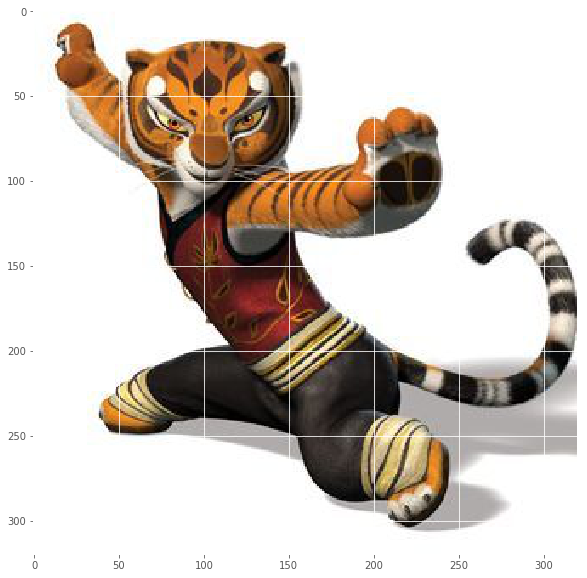

In [178]:
plt.imshow(image)

## Свёртки

Реализуйте функцию применяющую ядро kernel к изображению input_image. Для простоты, не будем делать padding, зафиксируем stride равным единице, а ядро свёртки будем считать квадратной матрицей (не трёхмерным тензором!) и приминять к каждому каналу независимо.

In [179]:
def conv2d(input_image, kernel):

    (iH, iW) = input_image.shape[:2]
    (kH, kW) = kernel.shape[:2]
    

    pad = (kW - 1) / 2
    pad = 1
    image = cv2.copyMakeBorder(input_image, pad, pad, pad, pad, cv2.BORDER_REPLICATE)
    output = np.zeros((iH, iW), dtype="float32")
    # loop over the input image, "sliding" the kernel across
    # each (x, y)-coordinate from left-to-right and top to
    # bottom
    for y in np.arange(pad, iH + pad):
        for x in np.arange(pad, iW + pad):
            # extract the ROI of the image by extracting the
            # *center* region of the current (x, y)-coordinates
            # dimensions
            
            roi = image[y - pad:y + pad + 1, x - pad:x + pad + 1]
            
            # perform the actual convolution by taking the
            # element-wise multiplicate between the ROI and
            # the kernel, then summing the matrix
            k = (roi * kernel).sum()
            
            # store the convolved value in the output (x,y)-
            # coordinate of the output image

            output[y - pad, x - pad] = k

    # rescale the output image to be in the range [0, 255]
    output = rescale_intensity(output, in_range=(0, 255))
    output = (output * 255).astype("uint8")

    # return the output image
    return output



Опишите ядро свёртки, выполняющее тождественное преобразование

In [180]:
identity_kernel = np.zeros((3,3))
identity_kernel = np.array((
    [0, 0, 0],
    [0, 1, 0],
    [0, 0, 0]))

In [181]:
same_image = conv2d(image, identity_kernel)

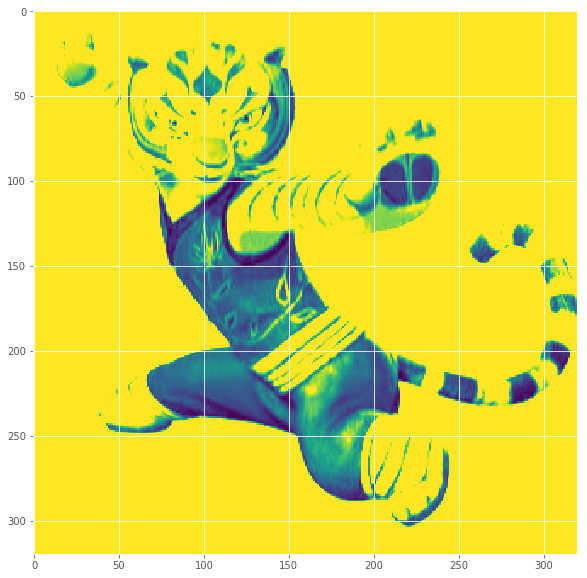

In [182]:
plt.imshow(same_image.astype(np.uint8))

Опишите ядро свёртки, выполняющее размытие

In [183]:
blur_kernel = np.zeros((3,3))
blur_kernel = np.ones((3, 3), dtype="float") * (1.0 / (3 * 3))
blur_kernel = np.array((
    [0.0625, 0.125, 0.0625],
    [0.125, 0.25, 0.125],
    [0.0625, 0.125, 0.0625]), dtype="float")
    

In [184]:
blurry_image = conv2d(image, blur_kernel)

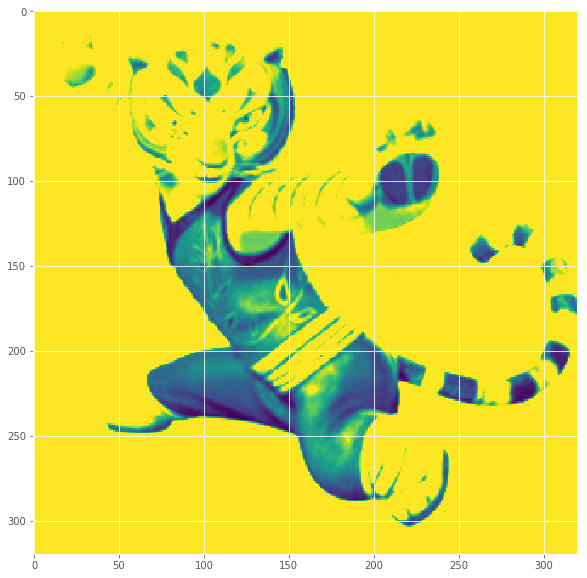

In [185]:
plt.imshow(blurry_image.astype(np.uint8))

А теперь подсветите границы объектов на изображении

In [186]:
edge_kernel = np.zeros((3,3))
edge_kernel = np.array((
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]), dtype="int")

In [187]:
edge_image =  conv2d(image, edge_kernel)

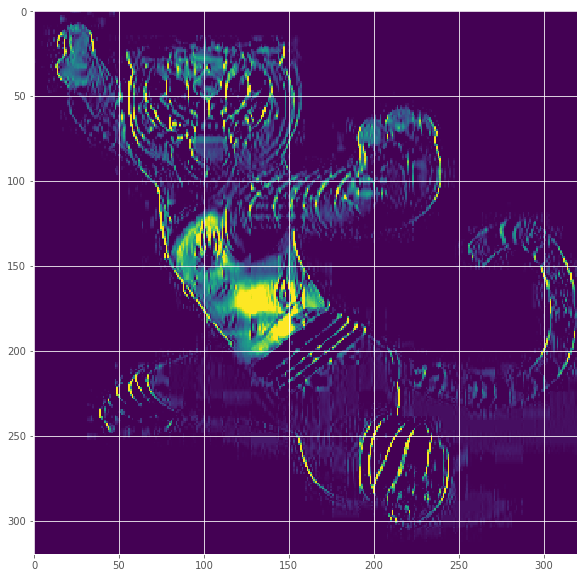

In [188]:
plt.imshow(edge_image.astype(np.uint8))

Кажется, что-то пошло не так... Возможно, необходимо сделать что-то ещё?